In [1]:
from sklearn.linear_model import SGDClassifier
from utilities import *

In [2]:
X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data()

found preprepared data in ..\data\ZMUMU_EGZ_extended_np_pd


In [3]:
hinge_sgd_clf = SGDClassifier(loss="hinge", max_iter=10000, tol=1e-3, random_state=42, learning_rate="adaptive",eta0=0.1)
log_sgd_clf = SGDClassifier(loss="log_loss", max_iter=10000, tol=1e-3, random_state=42, learning_rate="adaptive",eta0=0.1)
huber_sgd_clf = SGDClassifier(loss="modified_huber", max_iter=10000, tol=1e-3, random_state=42, learning_rate="adaptive", eta0=0.1)
squared_sgd_clf = SGDClassifier(loss="squared_hinge", max_iter=10000, tol=1e-3, random_state=42, learning_rate="adaptive", eta0=0.1)
perceptron_sgd_clf = SGDClassifier(loss="perceptron", max_iter=10000, tol=1e-3, random_state=42)

In [4]:
hinge_sgd_clf.fit(X_train, y_train)
log_sgd_clf.fit(X_train, y_train)
huber_sgd_clf.fit(X_train, y_train)
squared_sgd_clf.fit(X_train, y_train)
perceptron_sgd_clf.fit(X_train, y_train)

SGDClassifier(loss='perceptron', max_iter=10000, random_state=42)

In [ ]:
y_pred_hinge = hinge_sgd_clf.predict(X_test)
y_pred_log = log_sgd_clf.predict(X_test)
y_pred_huber = huber_sgd_clf.predict(X_test)
y_pred_squared = squared_sgd_clf.predict(X_test)
y_pred_perceptron = perceptron_sgd_clf.predict(X_test)

pd_passthrough_test["pred_hinge"] = y_pred_hinge
pd_passthrough_test["pred_log"] = y_pred_log
pd_passthrough_test["pred_huber"] = y_pred_huber
pd_passthrough_test["pred_squared"] = y_pred_squared
pd_passthrough_test["pred_perceptron"] = y_pred_perceptron

evaluate_sklearn_model(y_test, y_pred_hinge, show_CR=False, show_MSE=False, model_name="hinge")
evaluate_sklearn_model(y_test, y_pred_log, show_CR=False, show_MSE=False, model_name="log_loss")
evaluate_sklearn_model(y_test, y_pred_huber,show_CR=False, show_MSE=False, model_name="modified_huber")
evaluate_sklearn_model(y_test, y_pred_squared, show_CR=False, show_MSE=False, model_name="squared_hinge")
evaluate_sklearn_model(y_test, y_pred_perceptron, show_CR=False, show_MSE=False, model_name="perceptron")

Evaluation of hinge
Accuracy: 0.9425
Confusion Matrix:
 [[26770  1840]
 [  814 16758]]
Evaluation of log_loss
Accuracy: 0.9417
Confusion Matrix:
 [[26965  1645]
 [ 1048 16524]]
Evaluation of modified_huber
Accuracy: 0.9420
Confusion Matrix:
 [[26975  1635]
 [ 1042 16530]]
Evaluation of squared_hinge
Accuracy: 0.9401
Confusion Matrix:
 [[27001  1609]
 [ 1159 16413]]
Evaluation of perceptron
Accuracy: 0.8716
Confusion Matrix:
 [[26438  2172]
 [ 3759 13813]]


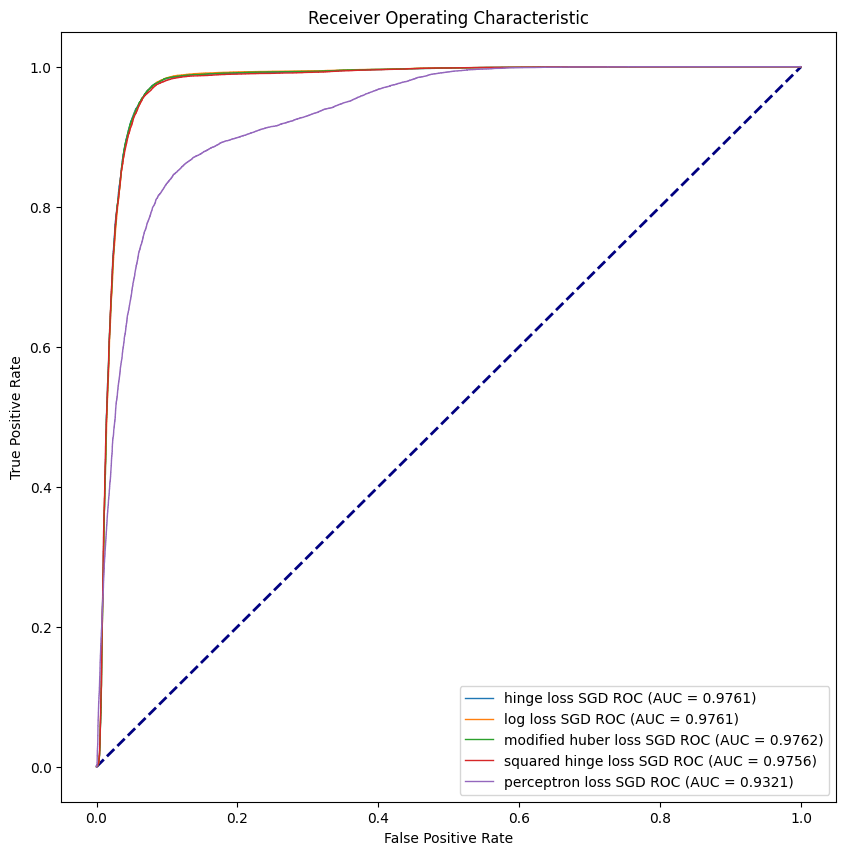

In [6]:
multi_roc({"hinge loss SGD":hinge_sgd_clf,"log loss SGD":log_sgd_clf,"modified huber loss SGD":huber_sgd_clf,"squared hinge loss SGD":squared_sgd_clf,"perceptron loss SGD":perceptron_sgd_clf},X_test,y_test)

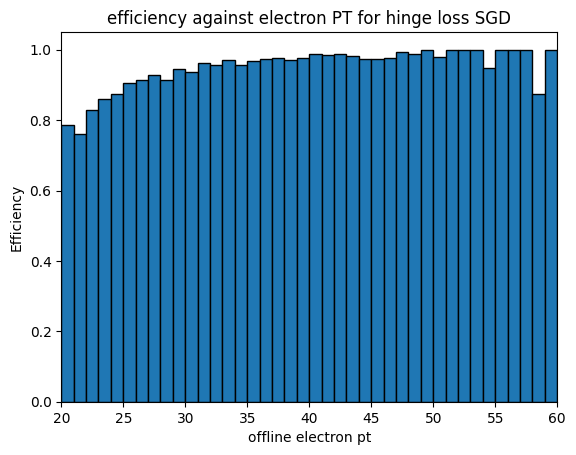

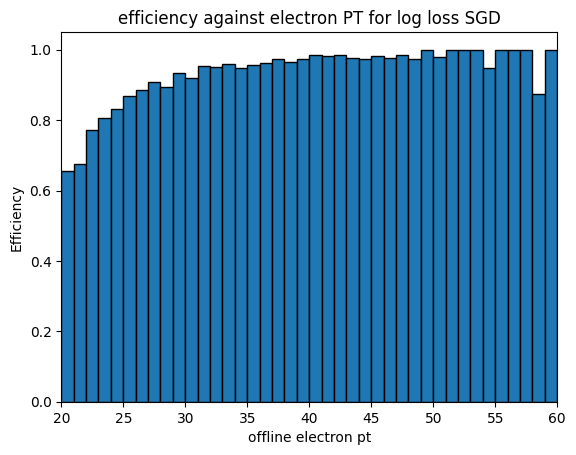

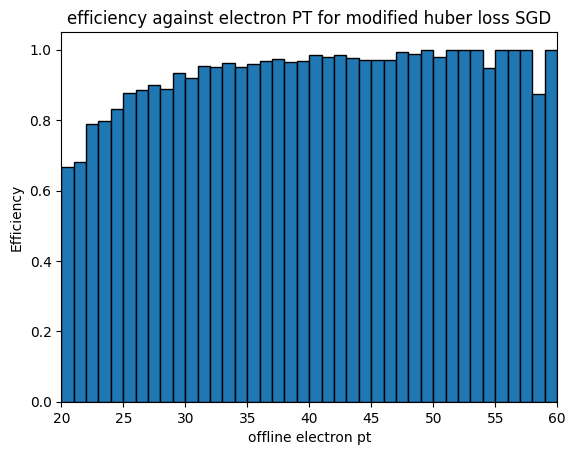

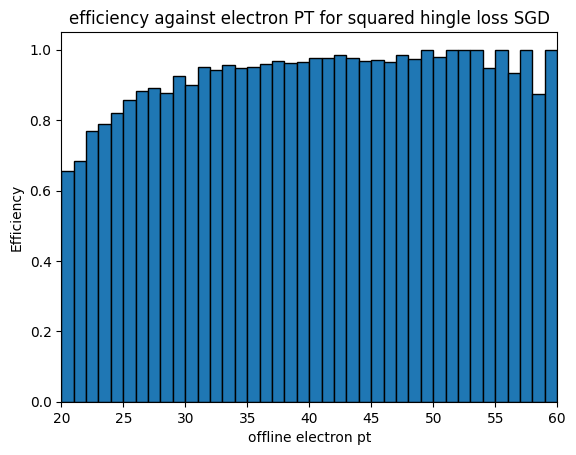

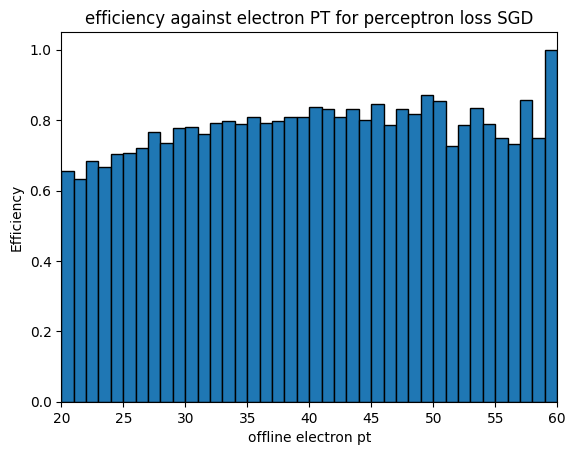

In [ ]:
plot_efficiency_vs_ele_PT(pd_passthrough_test, prediction_parameter="pred_hinge", title_string="hinge loss SGD")
plot_efficiency_vs_ele_PT(pd_passthrough_test, prediction_parameter="pred_log", title_string="log loss SGD")
plot_efficiency_vs_ele_PT(pd_passthrough_test, prediction_parameter="pred_huber", title_string="modified huber loss SGD")
plot_efficiency_vs_ele_PT(pd_passthrough_test, prediction_parameter="pred_squared", title_string="squared hingle loss SGD")
plot_efficiency_vs_ele_PT(pd_passthrough_test, prediction_parameter="pred_perceptron", title_string="perceptron loss SGD")